In [53]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
customers_df = pd.read_csv("Customers.csv")
transactions_df = pd.read_csv("Transactions.csv")

In [55]:
merged_df = transactions_df.merge(customers_df, on="CustomerID")

In [56]:
customer_features = merged_df.groupby('CustomerID').agg({
    'TotalValue': 'sum',         
    'TransactionID': 'count',   
    'Quantity': 'sum'         
}).rename(columns={
    'TotalValue': 'TotalSpending',
    'TransactionID': 'TransactionCount',
    'Quantity': 'TotalQuantity'
}).reset_index()

In [57]:
customer_features = customer_features.merge(customers_df, on="CustomerID")

In [58]:
customer_features.fillna(0, inplace=True)

In [59]:
customer_features = pd.get_dummies(customer_features, columns=["Region"], drop_first=True)

In [60]:
feature_matrix = customer_features.drop(columns=["CustomerID", "CustomerName", "SignupDate"])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(feature_matrix)

In [61]:
#Clustering Using K-Means
db_scores = []
cluster_range = range(2, 11)
optimal_k = None

for k in cluster_range:
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(scaled_features)
    db_index = davies_bouldin_score(scaled_features, clusters)
    db_scores.append(db_index)

    print(f"Number of Clusters: {k}, DB Index: {db_index:.4f}")

optimal_k = cluster_range[np.argmin(db_scores)]
print(f"\nOptimal number of clusters based on DB Index: {optimal_k}")

C:\Users\rvima\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


Number of Clusters: 2, DB Index: 1.4805


C:\Users\rvima\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


Number of Clusters: 3, DB Index: 1.2079


C:\Users\rvima\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


Number of Clusters: 4, DB Index: 0.9939


C:\Users\rvima\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


Number of Clusters: 5, DB Index: 0.9655


C:\Users\rvima\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


Number of Clusters: 6, DB Index: 0.9337


C:\Users\rvima\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


Number of Clusters: 7, DB Index: 0.8660


C:\Users\rvima\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


Number of Clusters: 8, DB Index: 0.8597


C:\Users\rvima\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


Number of Clusters: 9, DB Index: 0.8245


C:\Users\rvima\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


Number of Clusters: 10, DB Index: 0.7616

Optimal number of clusters based on DB Index: 10


C:\Users\rvima\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rvima\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


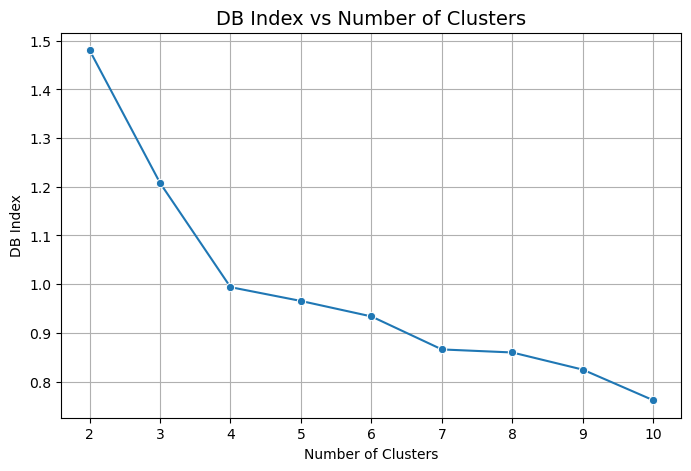

In [62]:
# Visualizing the DB Index for different cluster numbers
plt.figure(figsize=(8, 5))
sns.lineplot(x=list(cluster_range), y=db_scores, marker='o')
plt.title("DB Index vs Number of Clusters", fontsize=14)
plt.xlabel("Number of Clusters")
plt.ylabel("DB Index")
plt.xticks(cluster_range)
plt.grid()
plt.show()

In [64]:
#Final Clustering and Visualization
import os
os.environ["OMP_NUM_THREADS"] = "1"
from sklearn.decomposition import PCA

final_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
final_clusters = final_kmeans.fit_predict(scaled_features)

C:\Users\rvima\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [65]:
customer_features["Cluster"] = final_clusters

In [66]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

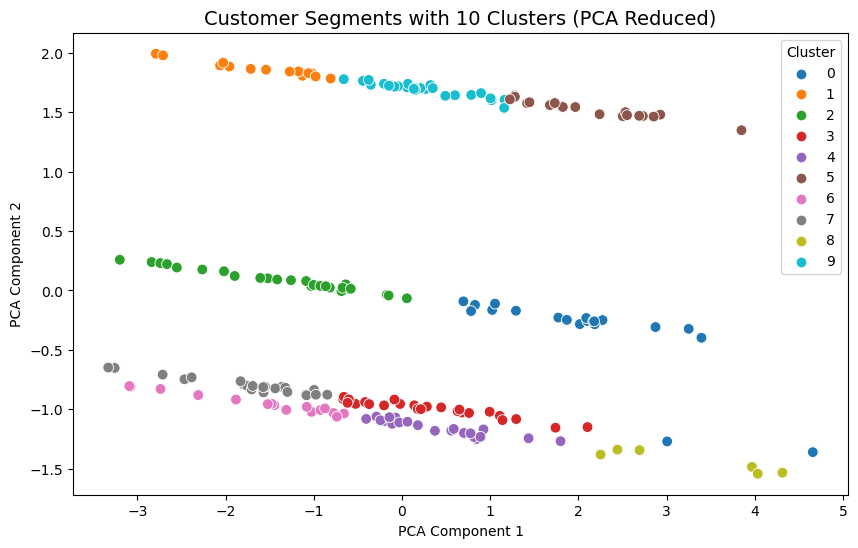

In [67]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=final_clusters, palette="tab10", s=60)
plt.title(f"Customer Segments with {optimal_k} Clusters (PCA Reduced)", fontsize=14)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

In [68]:
customer_features[["CustomerID", "Cluster"]].to_csv("Customer_Clusters.csv", index=False)

In [69]:
print(f"Number of Clusters: {optimal_k}")
print(f"Davies-Bouldin Index: {min(db_scores):.4f}")

Number of Clusters: 10
Davies-Bouldin Index: 0.7616
